In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tqdm import tqdm
import matplotlib.pyplot as plt

In [60]:
n_samples = 200
n_features = 2
centers = 2
cluster_std = 0.60
random_seed = 0

np.random.seed(random_seed)

In [61]:
X, y = datasets.make_blobs(n_samples=n_samples, n_features=n_features, centers = centers, cluster_std=cluster_std, random_state=random_seed)

# convert if y <= 0; y = -1
y = np.where(y <= 0, -1, 1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [63]:
class SVM:
	def __init__(self, n_features) -> None:
		# random initial weights
		self.w = np.random.randn(n_features)
		self.b = 0

	def fit(self, X: np.ndarray, y: np.ndarray, epochs = 1000, lr = 0.001, lambda_ = 0.01):
		for epoch in tqdm(range(epochs)):
			dw, db = self.gradient_descent(X, y, lambda_)

			# Applied Gradient
			self.w -= lr * dw
			self.b -= lr * db

	# predict
	def predict(self, X: np.ndarray):
		return np.sign(np.dot(X, self.w) + self.b) # 1 if > 0, -1 otherwise

	# calc Gradient_Descent
	def gradient_descent(self, X, y, lambda_):
		n, m = X.shape

		dw = np.zeros(m)
		db = 0

		for i in range(n):
			'''
				Loss = lambda * ||w||^2 + max(0, 1 - y[i]*f(x)
				if y*f(x) > = 1
					=> Loss = lambda * ||w||^2
					=> dw = 2 * lambda * w
					=> db = 0
				else:
					=> Loss = lambda * ||w||^2 + 1 - y[i]*f(x)
					=> dw = 2 * lambda * w - y[i] * x[i]
					=> db = -y[i]
			'''
			if y[i] * (np.dot(X[i], self.w) + self.b) >= 1:
				dw += 2 * lambda_ * self.w
			
			else:
				dw += 2 * lambda_ * self.w - np.dot(X[i], y[i])
				db += -y[i]
		
		return dw, db

In [64]:
model = SVM(n_features)

In [65]:
model.fit(X, y)

100%|██████████| 1000/1000 [00:00<00:00, 1984.08it/s]


In [66]:
# plot result
def plot(X, y, model: SVM):
	def get_hyperplane_value(x, w, b, offset):
		return (-w[0] * x - b + offset) / w[1]
	
	plt.scatter(X[:, 0], X[:, 1], marker='o', c = y)

	x0_1 = np.amin(X[:, 0])
	x0_2 = np.amax(X[:, 0])

	x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
	x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

	x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
	x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

	x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
	x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

	plt.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
	plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
	plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')


	plt.ylim([np.amin(X[:, 1])-1, np.amax(X[:, 1])+1])

	plt.show()

	


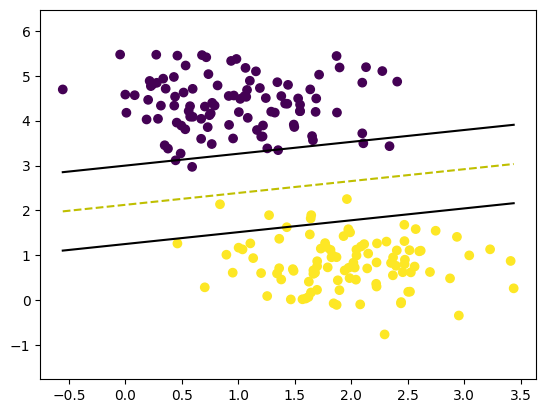

In [67]:
plot(X, y, model)